# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](https://curriculum-content.s3.amazonaws.com/data-science/images/diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [111]:
# Your code here
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diamonds = pd.read_csv('diamonds.csv', index_col=0)
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The following code checks that you loaded the data correctly:

In [112]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [113]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [114]:
# View the data types of the columns
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


And inspect the value counts for the categorical features:

In [115]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



In [116]:
# Inspect if the dataframe has any missing values
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [117]:
# Check for duplicates
print("Number of duplicates: ", diamonds.duplicated().sum())

Number of duplicates:  146


In [118]:
# drop duplicates
diamonds.drop_duplicates(inplace=True)
print("Number of duplicates after dropping: ", diamonds.duplicated().sum())

Number of duplicates after dropping:  0


## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [119]:
# Your code here - look at correlations
numerical_cols = diamonds.select_dtypes("number")
correlations = numerical_cols.corr()
correlations



,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


Identify the name of the predictor column with the strongest correlation below.

In [120]:
# Replace None with appropriate code
most_correlated = correlations.loc["price"].sort_values(ascending=False).index[1]
most_correlated

'carat'

The following code checks that you specified a column correctly:

In [121]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

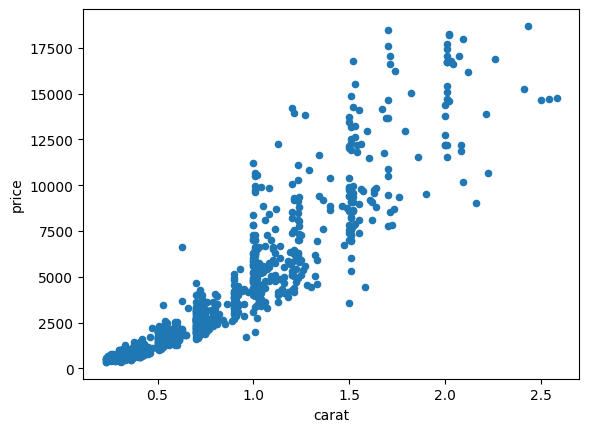

In [122]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

*Interpretation*

 - The scatter plot shows a positive correlation between the most correlated variable(carat) and price.
 - There is linear relationship between carat and price.


### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [123]:
# Replace None with appropriate code
y = diamonds['price']
X_baseline = diamonds['carat']


In [124]:
type(X_baseline)

# convert X_baseline to dataframe
X_baseline = pd.DataFrame(X_baseline)

The following code checks that you created valid `y` and `X_baseline` variables:

In [125]:
y.shape

(53794,)

In [126]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53794,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [127]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [128]:
# Your code here
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.030e+05
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:04:27   Log-Likelihood:            -4.7145e+05
No. Observations:               53794   AIC:                         9.429e+05
Df Residuals:                   53792   BIC:                         9.429e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2260.6268     13.083   -172.793      0.000   -2286.269   -2234.984
carat       7763.6586     14.103    550.491      0.000    7736.016    7791.301
==============================================================================
Omnibus:                    13955.519   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153135.105
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                      11.051   Cond. No.                         3.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then summarize your findings below:

In [129]:
# Your written answer here
# The R-squared value is 0.850, which indicates that 86% of the variance in the price can be explained by the carat weight of the diamonds.
# The model is statistically significant with a p-value of less than the standard 0.05

*ANSWER*
- The R-squared value is 0.850, which indicates that 86% of the variance in the price can be explained by the carat weight of the diamonds.
- The model is statistically significant with a p-value of less than the standard 0.05

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

In [130]:
categorical = diamonds.select_dtypes("object").columns
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

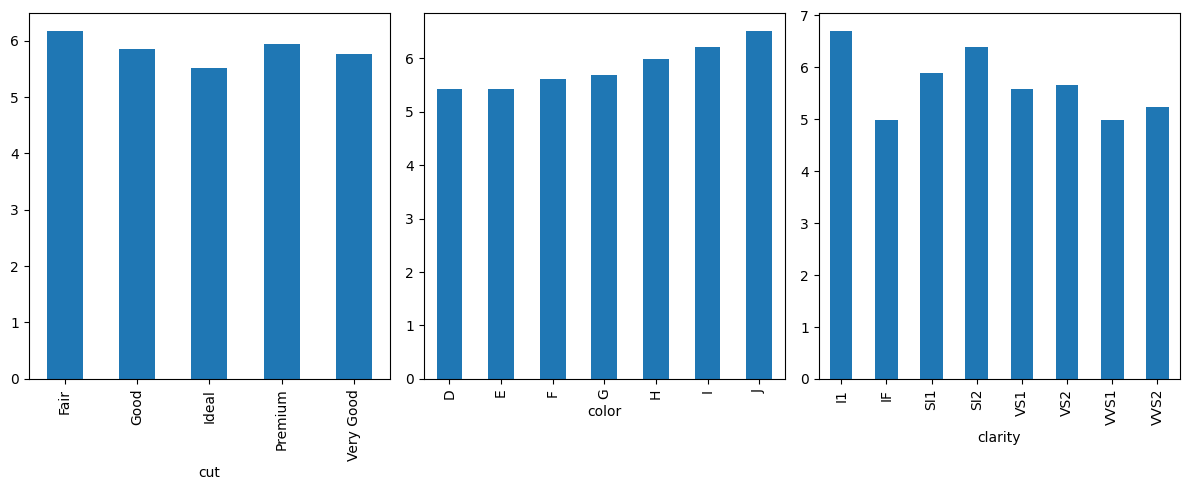

In [131]:
# Run this code without changes
import matplotlib.pyplot as plt

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature)['y'].mean().plot.bar(
        y="price", ax=axes[index])
plt.tight_layout()
plt.show()

Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [132]:
# Replace None with appropriate code
cat_col = 'cut'

The following code checks that you specified a column correctly:

In [133]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [134]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,cut
1,0.23,Ideal
2,0.21,Premium
3,0.23,Good
4,0.29,Premium
5,0.31,Good
...,...,...
53936,0.72,Ideal
53937,0.72,Good
53938,0.70,Very Good
53939,0.86,Premium


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [135]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated = pd.get_dummies(X_iterated, columns=[cat_col])
X_iterated

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1,0.23,False,False,True,False,False
2,0.21,False,False,False,True,False
3,0.23,False,True,False,False,False
4,0.29,False,False,False,True,False
5,0.31,False,True,False,False,False
...,...,...,...,...,...,...
53936,0.72,False,False,True,False,False
53937,0.72,False,True,False,False,False
53938,0.70,False,False,False,False,True
53939,0.86,False,False,False,True,False


The following code checks that you have the right number of columns:

In [136]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [137]:
# Your code here
# remove spaces from column names
X_iterated.columns = X_iterated.columns.str.replace(" ", "_")
X_iterated.columns


Index(['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very_Good'],
      dtype='object')

In [138]:
# Check the value counts of the original cut column
print(diamonds['cut'].value_counts())


cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64


In [139]:
# Drop one cut column from X_iterated
X_iterated.drop(columns=['cut_Very_Good'], inplace=True)

We now need to change the boolean values for the four "cut" column to 1s and 0s in order for the regression to run.

In [140]:
# Your code here
# Change boolean columns to integers
X_iterated = X_iterated.astype(int)

Now you should have 1 fewer column than before:

In [141]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

In [142]:
# view the statistics of the new dataframe
X_iterated.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.393799,0.567261,0.0,0.0,0.0,1.0,5.0
cut_Fair,53794.0,0.029706,0.169776,0.0,0.0,0.0,0.0,1.0
cut_Good,53794.0,0.090921,0.287499,0.0,0.0,0.0,0.0,1.0
cut_Ideal,53794.0,0.399450,0.489790,0.0,0.0,0.0,1.0,1.0
cut_Premium,53794.0,0.255568,0.436184,0.0,0.0,0.0,1.0,1.0


## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [143]:
# Your code here
#build the model
y = diamonds['price']
X_iterated = sm.add_constant(X_iterated)

iterated_model = sm.OLS(y, X_iterated)
iterated_results = iterated_model.fit()


## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [144]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:04:28   Log-Likelihood:            -4.8714e+05
No. Observations:               53794   AIC:                         9.743e+05
Df Residuals:                   53788   BIC:                         9.743e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1622.5272     19.874     81.640      

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

In [145]:
# compare the two models
print("Baseline model R-squared: ", baseline_results.rsquared)
print("Iterated model R-squared: ", iterated_results.rsquared)

Baseline model R-squared:  0.8492513086807094
Iterated model R-squared:  0.7298618684273056


In [146]:
# Your written answer here
# Interpret the coefficients of the model
# an increase of 1 carat in weight is associated with an increase of $6036 in price.


*Interpretation* 

- The R-squared value is 0.733, which indicates that 73% of the variance in the price can be explained by the carat weight and cut of the diamonds. 
- The model is statistically significant with a p-value of less than the standard 0.05
- The coefficients for the cut categories indicate the average price difference compared to the reference category (Very Good).
- The categorical variable increased complexity of the model thus decreasing model performance.
- an increase of 1 carat in weight is associated with an increase of $6036 in price.

- The iterated model underfitted due to complexity added by the cut category

## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.